In [23]:
from keras.datasets import boston_housing
import numpy as np

In [24]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [25]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [26]:
train_labels.shape, test_labels.shape

((404,), (102,))

In [27]:
standard_value = (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)

In [28]:
np.std(standard_value), np.mean(standard_value)

(0.9999999999999993, 2.6016254395785847e-15)

In [29]:
standard_value

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [30]:
# 归一化 （normalization）： （Xi -Xmin） / （Xmax - Xmin）
# 标准化 （standardization） （Xi - u） / theta
# tips 对输出结果有范围要求用归一化
#      数据较为稳定，不存在极端最大最小值用归一化
#      数据存在异常值和较多噪音 用标准化

#归一化：输出范围0-1之间
#标准化：输出范围负无穷到正无穷

In [31]:
np.min(train_data, axis=0), np.max(train_data, axis=0)
# 可以看出 特征的最小和最大值 范围相差很大，需要用标准化处理

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
        100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [32]:
# 标准化数据需要在训练集上进行计算

In [33]:
from keras import models
from keras import layers

In [34]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model

In [35]:
import matplotlib.pyplot as plt

In [36]:
def plot_result(epochs, loss, mae):
    plt.plot(epochs, loss, 'r', label='loss')
    plt.plot(epochs, mae, 'b', label='mean_absolute_error')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.show()

In [37]:
# 数据集比较小，为了在调节网络参数的同时对网络进行评估， 需要利用交叉验证对网络进行可靠评估

In [38]:
def k_fold_validation(train_data, train_labels, k=4, num_epochs=100):
    all_scores = []
    samples = len(train_data) // 4
    for i in range(4):
        # start = i * smaples_number
        # end = (i+1) * samples_number
        partial_val_data = train_data[i * samples:(i+1)*samples]
        partial_val_label = train_labels[i * samples:(i+1)*samples]
        partital_train_data = np.concatenate([train_data[(i+1)*samples:], train_data[:i*samples]])
        partital_train_label = np.concatenate([train_labels[(i+1)*samples:], train_labels[:i*samples]])
        # print(partial_val_data, partial_val_label, partital_train_data, partital_train_label)
        # return partial_val_data, partial_val_label, partital_train_data, partital_train_label
        model = build_model()
        history = model.fit(partital_train_data, partital_train_label, validation_data=(partial_val_data, partial_val_label),batch_size=1, epochs=num_epochs, verbose=0)
        all_scores.append(history.history)
    return all_scores

In [39]:
all_scores = k_fold_validation(standard_value, train_labels)

In [40]:
# 经过epoch=100的 4折交叉验证 平均损失为12.87， 同时预测的mae score为2.39 （mae是指 真实结果和预测结果之间的差的绝对值）

In [41]:
result = np.array([k_fold['val_mean_absolute_error'] for k_fold in all_scores])

In [42]:
result.shape

(4, 100)

In [43]:
mean_mae = np.mean(result, axis=0)

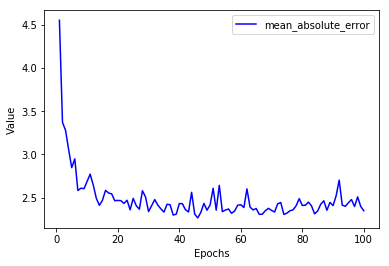

In [44]:
plt.plot([i for i in range(1, 101)], mean_mae, 'b', label='mean_absolute_error')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.show()